# K-Nearest-Neighbors (KNN)


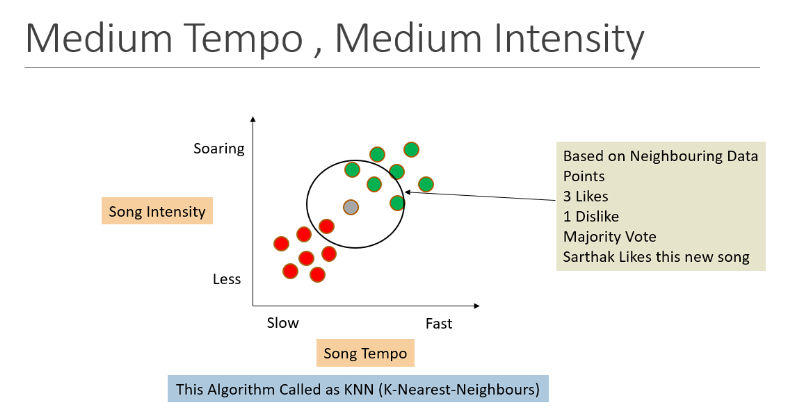

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step 1 : Read the dataset


In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 2: Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()


1

In [7]:
df = df.drop_duplicates(keep='first')



In [8]:
df.shape


(149, 5)

## Step 3: Seperate X and Y(species)


In [9]:

X = df.drop(columns=['species'])
Y = df[['species']]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [12]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

## Step 4: Apply preprocessing pipeline on X


In [13]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('sclaer', StandardScaler())]).set_output(transform='pandas')

In [16]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


## Step 5: Apply train test split


In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [18]:
xtrain.shape


(99, 4)

In [19]:
xtest.shape


(50, 4)

## Step 6: Create a KNN algorithm


In [20]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=31)
model1.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=31)

## model evaluation KNN

In [21]:
model1.score(xtrain, ytrain)


0.8888888888888888

In [22]:
model1.score(xtest, ytest)


0.92

## tune the KNN model

In [23]:
params = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9]}


In [24]:
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
rscv = RandomizedSearchCV(knn, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7, 8,
                                                        9]},
                   scoring='f1_macro')

In [25]:
rscv.best_params_


{'n_neighbors': 3}

In [26]:
rscv.best_score_


0.9029381729381729

In [27]:
best_knn = rscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

In [28]:
best_knn.score(xtrain, ytrain)


0.9292929292929293

In [29]:
best_knn.score(xtest, ytest)


1.0

In [30]:
ypred_train1 = best_knn.predict(xtrain)
ypred_test1 = best_knn.predict(xtest)

In [31]:
ypred_train1[0:5]


array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [32]:
ytrain.head()


,species
95,versicolor
104,virginica
66,versicolor
0,setosa
141,virginica


In [33]:
ypred_test1[0:5]


array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [34]:
ytest.head()


,species
73,versicolor
18,setosa
117,virginica
78,versicolor
76,versicolor


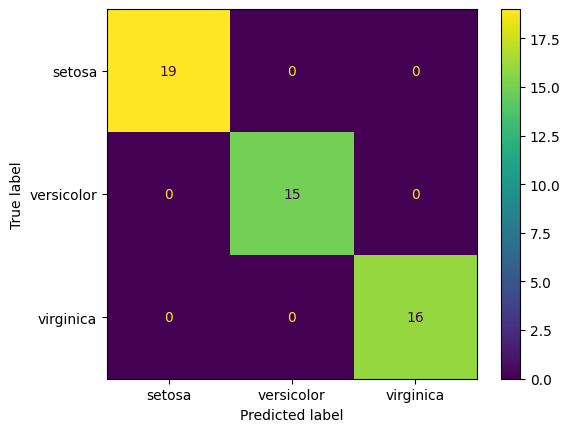

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_knn, xtest, ytest)

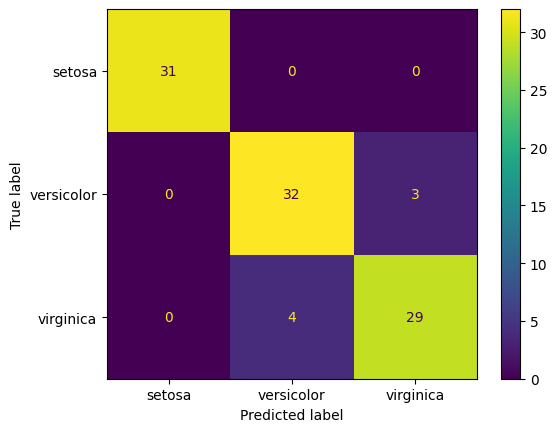

In [36]:
ConfusionMatrixDisplay.from_estimator(best_knn, xtrain, ytrain)


In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test1))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



## building SVM

In [38]:
from sklearn.svm import SVC
model_svm = SVC(probability=True)
model_svm.fit(xtrain, ytrain)

SVC(probability=True)

In [39]:
model_svm.score(xtrain, ytrain)


0.9595959595959596

In [40]:
model_svm.score(xtest, ytest)


1.0

In [41]:
from sklearn.model_selection import cross_val_score
scores_svm = cross_val_score(model_svm, xtrain, ytrain, cv=5, scoring='f1_macro')
scores_svm

array([0.95213675, 0.80952381, 0.90277778, 1.        , 0.94747475])

In [42]:
scores_svm.mean()

0.9223826173826174

In [43]:
scores_knn = cross_val_score(best_knn, xtrain, ytrain, cv=5, scoring='f1_macro')
scores_knn


array([0.90277778, 0.80952381, 0.90277778, 0.95213675, 0.94747475])

In [44]:
scores_knn.mean()


0.9029381729381729

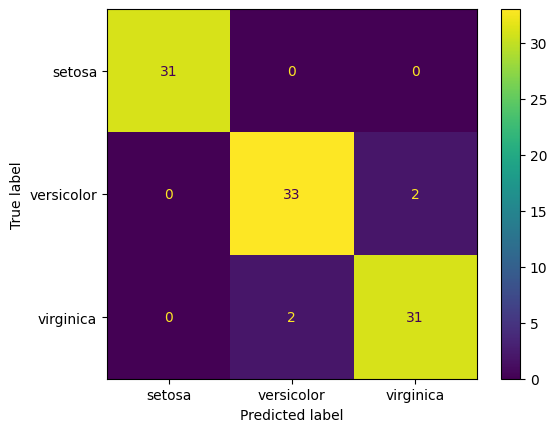

In [45]:
ConfusionMatrixDisplay.from_estimator(model_svm, xtrain, ytrain)


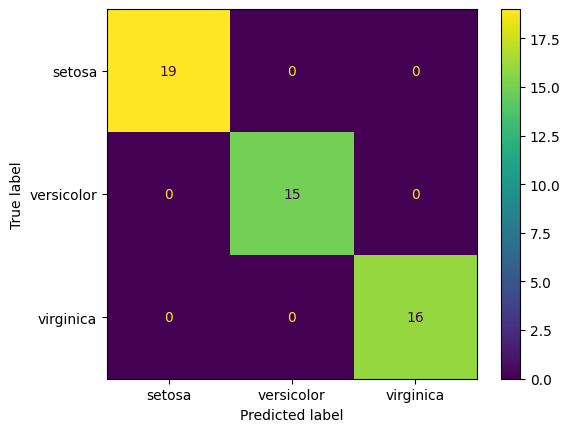

In [46]:
ConfusionMatrixDisplay.from_estimator(model_svm, xtest, ytest)


In [47]:
print(classification_report(ytest, model_svm.predict(xtest)))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



## select SVM from above because of higher cross validation score 0f 0.9224

### Step 8 : perform out of sample prediction

In [48]:

xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [49]:
num_pipe

Pipeline(steps=[('imputer', SimpleImputer()), ('sclaer', StandardScaler())])

In [50]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.000000,-1.308624
4,0.068082,-0.137353,0.766812,0.796477
5,-0.414976,1.012401,-1.390014,-1.308624
6,-0.294211,0.000000,-0.084566,0.138633
7,0.792668,-0.137353,0.823571,1.059614
8,-0.656505,1.472303,-1.276496,-1.308624
9,-0.898033,0.782450,-1.276496,0.000000


## Predict results with probabilty


In [51]:
preds = model_svm.predict(xnew_pre)
probs = model_svm.predict_proba(xnew_pre)

In [52]:
model_svm.classes_


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [53]:
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [54]:
probs

array([[0.00803603, 0.96491612, 0.02704784],
       [0.01383016, 0.02199201, 0.96417783],
       [0.03389217, 0.94980212, 0.01630571],
       [0.64539431, 0.28054335, 0.07406234],
       [0.01313643, 0.22376641, 0.76309716],
       [0.95890164, 0.02371222, 0.01738614],
       [0.04790313, 0.93851339, 0.01358348],
       [0.00995233, 0.03686203, 0.95318563],
       [0.96565275, 0.01917169, 0.01517556],
       [0.81739133, 0.13277283, 0.04983584],
       [0.01275488, 0.9787974 , 0.00844772],
       [0.01332832, 0.97799245, 0.00867923],
       [0.02425319, 0.02713525, 0.94861157],
       [0.02008404, 0.71770536, 0.2622106 ],
       [0.02119088, 0.51164763, 0.46716149]])

In [55]:
import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([0.96491612, 0.96417783, 0.94980212, 0.64539431, 0.76309716,
       0.95890164, 0.93851339, 0.95318563, 0.96565275, 0.81739133,
       0.9787974 , 0.97799245, 0.94861157, 0.71770536, 0.51164763])

## Save above results to dataframe and csv

In [56]:

xnew['species_pred'] = preds 
xnew['prob'] = max_probs

In [57]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,prob
0,5.5,2.5,4.0,1.3,versicolor,0.964916
1,6.9,3.1,5.1,2.3,virginica,0.964178
2,5.1,2.5,3.0,1.1,versicolor,0.949802
3,4.4,2.9,NaN,0.2,setosa,0.645394
4,5.9,3.0,5.1,1.8,virginica,0.763097
5,5.5,3.5,1.3,0.2,setosa,0.958902
6,5.6,NaN,3.6,1.3,versicolor,0.938513
7,6.5,3.0,5.2,2.0,virginica,0.953186
8,5.3,3.7,1.5,0.2,setosa,0.965653
9,5.1,3.4,1.5,NaN,setosa,0.817391


In [58]:
xnew.to_csv('SVMResults.csv', index=False)